In [1]:
import sys
import os

# Navigate up two levels from notebook to get to project root
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
src_path = os.path.abspath(os.path.join(notebook_dir, "../../src"))

if src_path not in sys.path:
    sys.path.append(src_path)

# Now import your functions from eda.py inside src
from RFMmetrics import (get_snapshot_date,load_data,
   main_task_4,)
from visualization import (
    visualize_individual_metrics,
    visualize_rfm,
    visualize_clusters,
    visualize_high_risk_distribution,
)

In [2]:
file_path = r'C:\Users\ABC\Desktop\10Acadamy\Week 5\Credit-Risk-Probability-Model\data\processed\processed_clean_data.csv'
data = load_data(file_path)


✅ Data loaded successfully from: C:\Users\ABC\Desktop\10Acadamy\Week 5\Credit-Risk-Probability-Model\data\processed\processed_clean_data.csv


In [3]:
snapshot_date = get_snapshot_date(data)


Snapshot Date: 2019-02-13 10:01:28


## 🧠 Task 4: Concept Overview – Customer Segmentation Using RFM Analysis

Task 4 involves performing a **Customer Segmentation analysis** using **RFM** (Recency, Frequency, Monetary) metrics. This is a popular approach in marketing for evaluating customer behavior and grouping them based on purchasing patterns.

---

### 📊 1. RFM Metrics

- **Recency (R)**:  
  Measures how recently a customer made a purchase.  
  → *More recent purchases indicate higher engagement.*

- **Frequency (F)**:  
  Measures how often a customer makes purchases in a given time frame.  
  → *Frequent buyers are considered more loyal.*

- **Monetary (M)**:  
  Measures the total amount a customer spends.  
  → *Higher values indicate more valuable customers.*

👉 These metrics help businesses prioritize marketing based on customer value and behavior.

---

### 🔁 2. Data Aggregation

- Transaction data is **grouped by `CustomerId`**.
- Then, for each customer:
  - **Recency** is calculated from the last purchase date.
  - **Frequency** is the total number of purchases.
  - **Monetary** is the total amount spent.(i use Value insted of Amaount cause we seen that the debit transaction is more than credited transaction)

---

### 📏 3. Data Scaling

Since RFM metrics are on different scales:
- Standardization (e.g., `StandardScaler`) is applied.
- This prevents one metric from dominating the clustering model.

---

### 🤖 4. Customer Clustering

- **K-Means Clustering** is used to group customers based on their RFM scores.
- Clusters might represent:
  - High-value customers
  - At-risk customers
  - New customers
  - Loyal repeat buyers

---

### 🚨 5. High-Risk Labeling

- After clustering, specific groups (e.g., low recency/frequency/monetary scores) are labeled as **"high-risk"**.
- These customers may need **targeted retention strategies**.

---

### 🔄 6. Integration of Results

- The final RFM scores and cluster labels are **merged back into the main dataset**.
- This enriched dataset is used for:
  - Reporting
  - Visualization
  - Strategic decision-making

---

## ✅ Summary

Task 4 applies **RFM-based customer segmentation** to support smarter marketing decisions.  
By analyzing behavior over time, businesses can:

- Engage loyal customers
- Re-target or win back at-risk ones
- Maximize profitability through personalized outreach

> The approach is fully **data-driven**, relying on historical transactions to predict future customer behavior.


In [ ]:

# Execute Task 4
final_data = main_task_4(data, snapshot_date, n_clusters=3, high_risk_cluster_number=2)

# Display the final dataset with high-risk labels
print(final_data.head())

          TransactionId         BatchId       AccountId       SubscriptionId  \
0   TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_118063  BatchId_118460  AccountId_2442  SubscriptionId_1980   
2   TransactionId_51905   BatchId_93774   AccountId_272  SubscriptionId_4731   
3  TransactionId_130161   BatchId_82409   AccountId_710   SubscriptionId_920   
4   TransactionId_51800  BatchId_112288  AccountId_2634  SubscriptionId_3511   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_2858          UGX          256  ProviderId_5   ProductId_3   
2   CustomerId_598          UGX          256  ProviderId_6  ProductId_10   
3  CustomerId_1053          UGX          256  ProviderId_1  ProductId_15   
4  CustomerId_3052          UGX          256  ProviderId_6   ProductId_3   

      ProductCategory  ... Recency_in_person  Transaction_Hour

In [5]:
print(final_data.columns)

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult',
       'Net_Total_Transaction_Amount', 'Gross_Transaction_Amount',
       'Average_Transaction_Amount', 'Transaction_Count',
       'Std_Transaction_Amount', 'Last_Transaction_Date', 'Recency_in_person',
       'Transaction_Hour', 'Transaction_Day', 'Transaction_Month',
       'Transaction_Year', 'Recency', 'Frequency', 'Monetary', 'Cluster',
       'is_high_risk'],
      dtype='object')


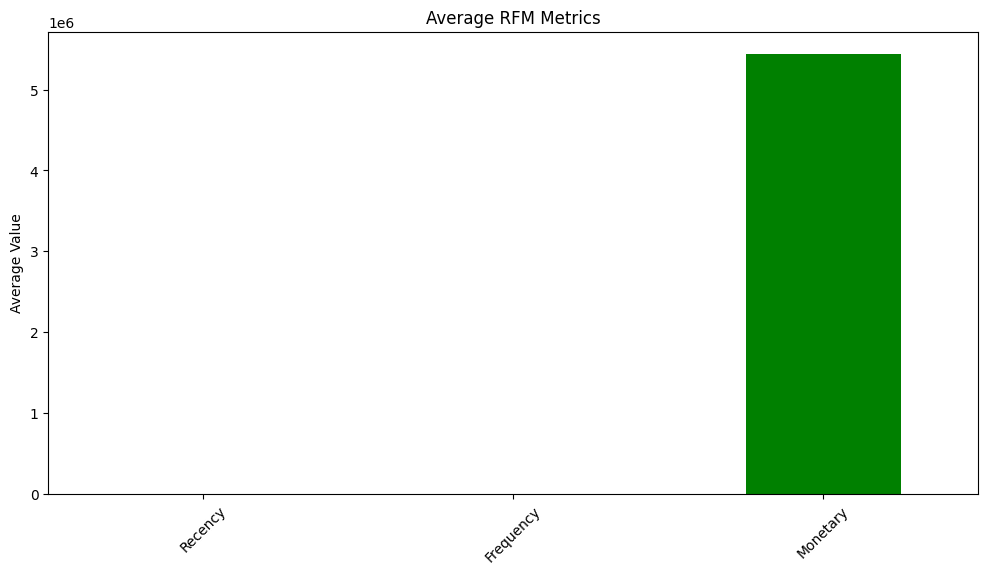

In [6]:
visualize_rfm(final_data)


c:\Users\ABC\Desktop\10Acadamy\Week 5\Credit-Risk-Probability-Model\src\visualization.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Recency'], y=[rfm_df['Recency'].mean()], ax=axs[0], palette='Blues')
c:\Users\ABC\Desktop\10Acadamy\Week 5\Credit-Risk-Probability-Model\src\visualization.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Frequency'], y=[rfm_df['Frequency'].mean()], ax=axs[1], palette='Greens')
c:\Users\ABC\Desktop\10Acadamy\Week 5\Credit-Risk-Probability-Model\src\visualization.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same ef

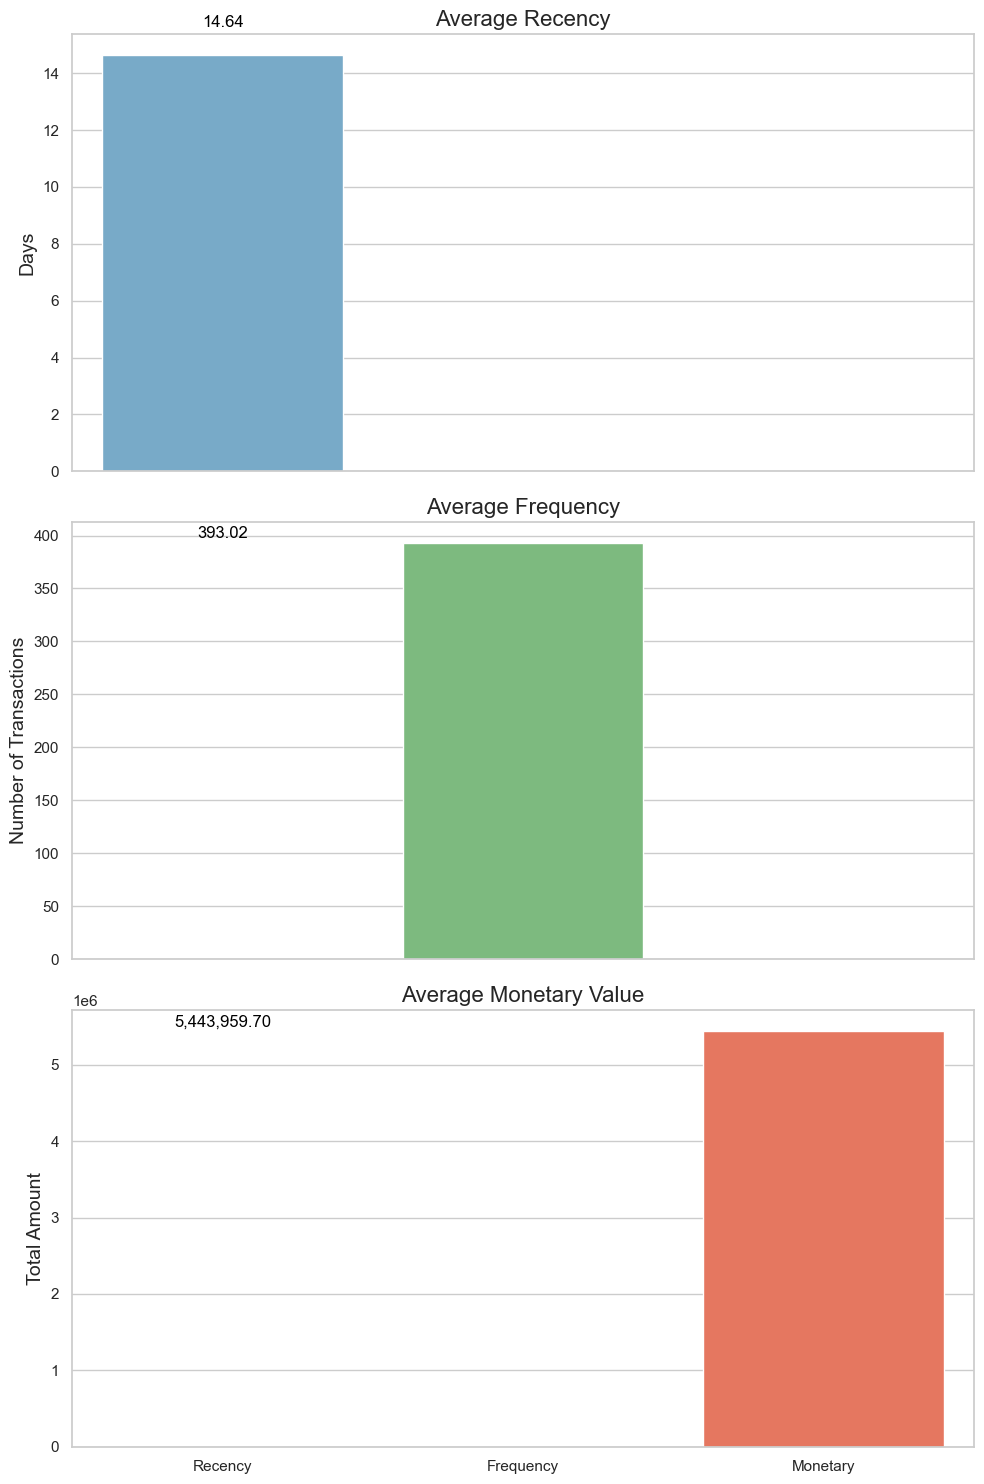

In [7]:
visualize_individual_metrics(final_data)

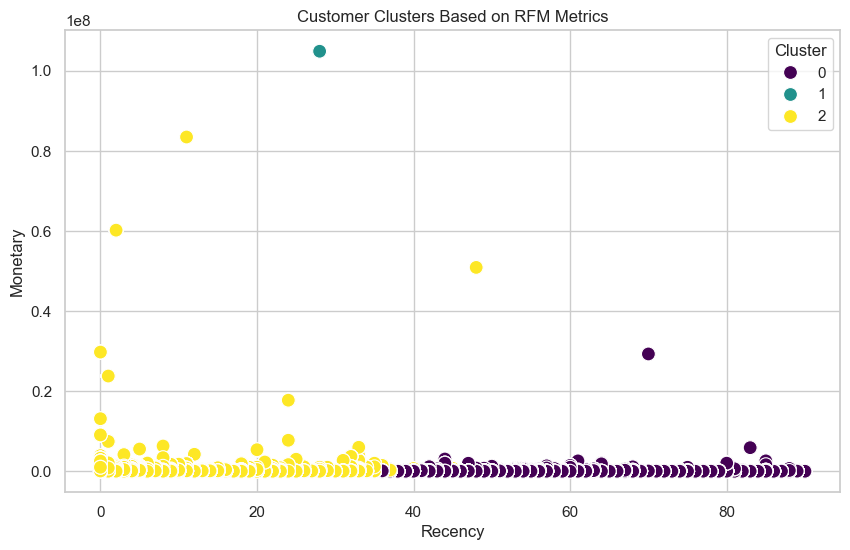

In [8]:
visualize_clusters(final_data)

# Customer Clusters Based on RFM Metrics

The scatter plot below visualizes customer segmentation based on RFM (Recency, Frequency, Monetary) metrics. Each point represents a customer, and the colors indicate different clusters identified through K-Means clustering.

### Key Observations

- **Axes**:
  - **Recency**: The horizontal axis represents the number of days since the last purchase. Lower values indicate more recent purchases.
  - **Monetary**: The vertical axis represents the total amount spent, calculated using the **Value** column. This approach accounts for the fact that debit transactions are more prevalent than credited transactions.

- **Clusters**:
  - **Cluster 0**: Represented by the color teal, this cluster likely contains customers with distinct purchasing behaviors.
  - **Cluster 1**: Shown in yellow, this cluster may represent customers who are less active but maintain a certain level of engagement.
  - **Cluster 2**: Indicated by purple, this group consists of high-value customers who frequently purchase and contribute significantly to revenue.

### Insights

- The plot reveals a significant concentration of customers with low recency but varying monetary values, indicating that many customers have not purchased recently yet still contribute positively to revenue.
- The presence of a few outliers in the monetary value suggests that there are customers who may have made large transactions, potentially skewing the average.
- The distribution of clusters indicates that most customers fall into Cluster 1 (yellow), while Clusters 0 and 2 (teal and purple) represent more specialized segments.

### Conclusion

This visualization aids in understanding customer segmentation, allowing businesses to tailor marketing strategies based on the characteristics of each cluster. Further analysis can be conducted to identify specific strategies for each customer group, enhancing customer engagement and retention.

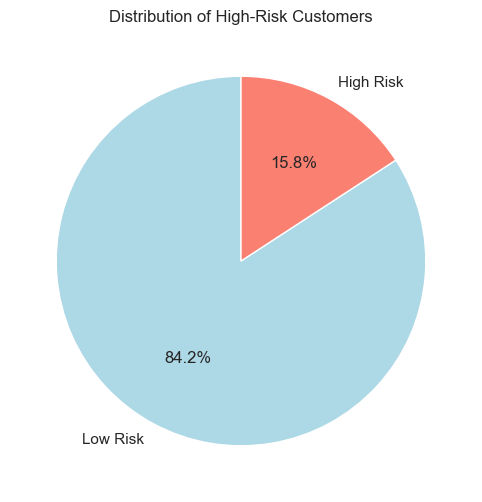

In [9]:
visualize_high_risk_distribution(final_data)

# Distribution of High-Risk Customers

The pie chart above illustrates the distribution of customers classified as high-risk versus low-risk based on the RFM analysis.

### Key Observations

- **High Risk**: 
  - **Percentage**: 15.8%
  - This segment represents customers identified as high-risk, indicating that they may require special attention or targeted marketing strategies to improve their engagement and retention.

- **Low Risk**: 
  - **Percentage**: 84.2%
  - This larger segment consists of customers who are deemed low-risk, suggesting they are more stable and engaged with the business.

### Insights

- A relatively small portion of customers falls into the high-risk category, highlighting the importance of focusing marketing efforts on this group to mitigate potential churn.
- The majority of customers are classified as low-risk, which may indicate a strong base of loyal customers. However, understanding the behaviors of the high-risk segment can provide valuable insights for improving customer retention strategies.

### Conclusion

This visualization provides a clear understanding of customer risk distribution. By focusing on the high-risk segment, businesses can implement targeted interventions aimed at converting these customers into loyal, engaged clients.

In [12]:
print(final_data.columns)

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult',
       'Net_Total_Transaction_Amount', 'Gross_Transaction_Amount',
       'Average_Transaction_Amount', 'Transaction_Count',
       'Std_Transaction_Amount', 'Last_Transaction_Date', 'Recency_in_person',
       'Transaction_Hour', 'Transaction_Day', 'Transaction_Month',
       'Transaction_Year', 'Recency', 'Frequency', 'Monetary', 'Cluster',
       'is_high_risk'],
      dtype='object')


In [13]:
output_path = r"C:\Users\ABC\Desktop\10Acadamy\Week 5\Credit-Risk-Probability-Model\data\processed\final_data.csv"
final_data.to_csv(output_path, index=False)